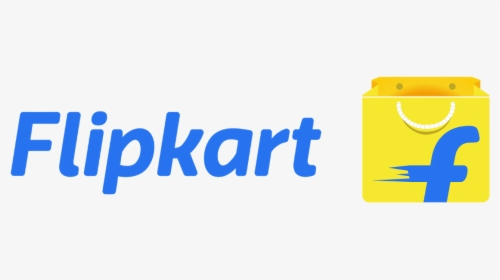

# **Project Title - Flipkart Mobile and Laptop data analysis**
The data used in this analysis was flipkart sales data of all the mobile brands
and Laptop brands which there is detailed about the  brand, color, selling price, original price,memory, storage etc, this data I have extracted using BeautifulSoup from Flipkart.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go

# Get the Scrapped Dataset


In [ ]:
mobile_df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MobilesDataSet.csv')
Laptop_df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LaptopDataSet.csv')
#mobile_df =  pd.read_csv('MobilesDataSet.csv')
#Laptop_df =  pd.read_csv('LaptopDataSet.csv')

In [ ]:
mobile_df

,Unnamed: 0,Brand,Model,Color,Processor,RAM,Battery,Camera,Display,Warranty,originalPrice,discountPercent,discountedPrice,rating,reviews
0,0,REDMI,"9i Sport (Metallic Blue, 64 GB)",Metallic Blue,MediaTek Helio G25 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,5000 mAh Li-Polymer Battery,13MP Rear Camera | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,Brand Warranty of 1 Year Available for Mobile ...,"₹9,999",12% off,"₹8,799",4.4,"40,454 Ratings & 2,049 Reviews"
1,1,REDMI,"9i Sport (Coral Green, 64 GB)",Coral Green,MediaTek Helio G25 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,5000 mAh Li-Polymer Battery,13MP Rear Camera | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,Brand Warranty of 1 Year Available for Mobile ...,"₹9,999",12% off,"₹8,799",4.4,"40,454 Ratings & 2,049 Reviews"
2,2,realme,"Narzo 50A (Oxygen Blue, 128 GB)",Oxygen Blue,MediaTek Helio G85 Processor,4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,6000 mAh Battery,50MP + 2MP + 2MP | 8MP Front Camera,16.51 cm (6.5 inch) HD+ Display,1 Year Warranty for Mobile and 6 Months for Ac...,"₹13,999",10% off,"₹12,499",4.4,"2,05,217 Ratings & 12,519 Reviews"
3,3,realme,"Narzo 50A (Oxygen Green, 64 GB)",Oxygen Green,MediaTek Helio G85 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,6000 mAh Battery,50MP + 2MP + 2MP | 8MP Front Camera,16.51 cm (6.5 inch) HD+ Display,1 Year Warranty for Mobile and 6 Months for Ac...,"₹12,999",11% off,"₹11,499",4.4,"2,05,217 Ratings & 12,519 Reviews"
4,4,REDMI,"9i Sport (Carbon Black, 64 GB)",Carbon Black,MediaTek Helio G25 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,5000 mAh Li-Polymer Battery,13MP Rear Camera | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,Brand Warranty of 1 Year Available for Mobile ...,"₹9,999",12% off,"₹8,799",4.4,"40,454 Ratings & 2,049 Reviews"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,1008,I,Kall K37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009,1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,1010,APPLE,"iPhone SE (White, 256 GB)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011,1011,KARBONN,K-Phone 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
Laptop_df

,Unnamed: 0,Brand,Model,Processor,RAM,Operating System,Storage,Display,Warranty,originalPrice,discountPercent,discountedPrice,rating,reviews
0,0,HP,Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹49,590",15% off,"₹41,990",4.3,511 Ratings & 39 Reviews
1,1,ASUS,Vivobook Gaming Core i5 9th Gen - (8 GB/1 TB H...,Intel Core i5 Processor (9th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,"₹77,990",33% off,"₹51,490",4.5,33 Ratings & 5 Reviews
2,2,Lenovo,IdeaPad 3 Celeron Dual Core 4th Gen - (4 GB/25...,Intel Celeron Dual Core Processor (4th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Years Carry in Warranty,"₹40,490",27% off,"₹29,490",4.1,129 Ratings & 9 Reviews
3,3,Lenovo,APU Dual Core A9 A99425 - (4 GB/1 TB HDD/DOS) ...,AMD APU Dual Core A9 Processor,4 GB DDR4 RAM,64 bit DOS Operating System,1 TB HDD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,NaN,NaN,"₹21,896",3.9,197 Ratings & 13 Reviews
4,4,acer,Aspire 7 Core i5 10th Gen - (8 GB/512 GB SSD/W...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty,"₹89,999",36% off,"₹56,990",4.4,"9,117 Ratings & 981 Reviews"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,664,NaN,NaN,NaN,NaN,Chrome Operating System,NaN,29.46 cm (11.6 inch) Touchscreen Display,NaN,NaN,NaN,NaN,NaN,NaN
665,665,NaN,NaN,NaN,NaN,64 bit Windows 10 Operating System,NaN,29.46 cm (11.6 inch) Touchscreen Display,NaN,NaN,NaN,NaN,NaN,NaN
666,666,NaN,NaN,NaN,NaN,32 bit Chrome Operating System,NaN,39.62 cm (15.6 inch) Display,NaN,NaN,NaN,NaN,NaN,NaN
667,667,NaN,NaN,NaN,NaN,64 bit Windows 10 Operating System,NaN,35.56 cm (14 inch) Display,NaN,NaN,NaN,NaN,NaN,NaN


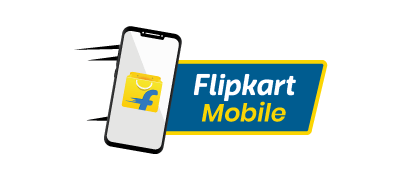

# ***MOBILE DATA***

In [ ]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1013 non-null   int64  
 1   Brand            726 non-null    object 
 2   Model            726 non-null    object 
 3   Color            439 non-null    object 
 4   Processor        428 non-null    object 
 5   RAM              722 non-null    object 
 6   Battery          747 non-null    object 
 7   Camera           677 non-null    object 
 8   Display          765 non-null    object 
 9   Warranty         439 non-null    object 
 10  originalPrice    458 non-null    object 
 11  discountPercent  432 non-null    object 
 12  discountedPrice  720 non-null    object 
 13  rating           715 non-null    float64
 14  reviews          715 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 118.8+ KB


## Data Cleaning

In [ ]:
#Removing ₹ from originalPrice, discountedPrice
mobile_df['originalPrice'] = pd.to_numeric(mobile_df['originalPrice'].replace('[^0-9\.-]', "", regex=True))
mobile_df['discountedPrice'] = pd.to_numeric(mobile_df['discountedPrice'].replace('[^0-9\.-]', "", regex=True))
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1013 non-null   int64  
 1   Brand            726 non-null    object 
 2   Model            726 non-null    object 
 3   Color            439 non-null    object 
 4   Processor        428 non-null    object 
 5   RAM              722 non-null    object 
 6   Battery          747 non-null    object 
 7   Camera           677 non-null    object 
 8   Display          765 non-null    object 
 9   Warranty         439 non-null    object 
 10  originalPrice    458 non-null    float64
 11  discountPercent  432 non-null    float64
 12  discountedPrice  720 non-null    float64
 13  rating           715 non-null    float64
 14  reviews          715 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 118.8+ KB


In [ ]:
mobile_df['discountPercent'] = pd.to_numeric(mobile_df['discountPercent'].replace("[^0-9]", "", regex=True))
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1013 non-null   int64  
 1   Brand            726 non-null    object 
 2   Model            726 non-null    object 
 3   Color            439 non-null    object 
 4   Processor        428 non-null    object 
 5   RAM              722 non-null    object 
 6   Battery          747 non-null    object 
 7   Camera           677 non-null    object 
 8   Display          765 non-null    object 
 9   Warranty         439 non-null    object 
 10  originalPrice    458 non-null    float64
 11  discountPercent  432 non-null    float64
 12  discountedPrice  720 non-null    float64
 13  rating           715 non-null    float64
 14  reviews          715 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 118.8+ KB


In [ ]:
mobile_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1013.0,506.000000,292.572213,0.0,253.00,506.0,759.00,1012.0
originalPrice,458.0,16357.246725,15352.404662,749.0,6839.25,13990.0,20605.00,89900.0
discountPercent,432.0,11.726852,7.483589,1.0,6.00,11.0,16.00,38.0
discountedPrice,720.0,11232.686111,12536.683909,699.0,1290.50,8999.0,15919.25,84900.0
rating,715.0,4.144196,0.250834,3.0,4.00,4.2,4.30,4.7


In [ ]:
mobile_df.head()

,Unnamed: 0,Brand,Model,Color,Processor,RAM,Battery,Camera,Display,Warranty,originalPrice,discountPercent,discountedPrice,rating,reviews
0,0,REDMI,"9i Sport (Metallic Blue, 64 GB)",Metallic Blue,MediaTek Helio G25 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,5000 mAh Li-Polymer Battery,13MP Rear Camera | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,Brand Warranty of 1 Year Available for Mobile ...,9999.0,12.0,8799.0,4.4,"40,454 Ratings & 2,049 Reviews"
1,1,REDMI,"9i Sport (Coral Green, 64 GB)",Coral Green,MediaTek Helio G25 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,5000 mAh Li-Polymer Battery,13MP Rear Camera | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,Brand Warranty of 1 Year Available for Mobile ...,9999.0,12.0,8799.0,4.4,"40,454 Ratings & 2,049 Reviews"
2,2,realme,"Narzo 50A (Oxygen Blue, 128 GB)",Oxygen Blue,MediaTek Helio G85 Processor,4 GB RAM | 128 GB ROM | Expandable Upto 256 GB,6000 mAh Battery,50MP + 2MP + 2MP | 8MP Front Camera,16.51 cm (6.5 inch) HD+ Display,1 Year Warranty for Mobile and 6 Months for Ac...,13999.0,10.0,12499.0,4.4,"2,05,217 Ratings & 12,519 Reviews"
3,3,realme,"Narzo 50A (Oxygen Green, 64 GB)",Oxygen Green,MediaTek Helio G85 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,6000 mAh Battery,50MP + 2MP + 2MP | 8MP Front Camera,16.51 cm (6.5 inch) HD+ Display,1 Year Warranty for Mobile and 6 Months for Ac...,12999.0,11.0,11499.0,4.4,"2,05,217 Ratings & 12,519 Reviews"
4,4,REDMI,"9i Sport (Carbon Black, 64 GB)",Carbon Black,MediaTek Helio G25 Processor,4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,5000 mAh Li-Polymer Battery,13MP Rear Camera | 5MP Front Camera,16.59 cm (6.53 inch) HD+ Display,Brand Warranty of 1 Year Available for Mobile ...,9999.0,12.0,8799.0,4.4,"40,454 Ratings & 2,049 Reviews"


In [ ]:
mobile_df.sample(10)

,Unnamed: 0,Brand,Model,Color,Processor,RAM,Battery,Camera,Display,Warranty,originalPrice,discountPercent,discountedPrice,rating,reviews
85,85,Infinix,"Smart 5 (Morandi Green, 32 GB)",Morandi Green,MediaTek Helio G25 Processor,2 GB RAM | 32 GB ROM | Expandable Upto 256 GB,5000 mAh Lithium-ion Polymer Battery,13MP + Depth Lens | 8MP Front Camera,16.54 cm (6.51 inch) HD+ Display,1 Year Warranty for Handset and 6 Months for I...,8999.0,16.0,7499.0,4.3,"89,579 Ratings & 6,770 Reviews"
218,218,Infinix,"Hot 11S (Silver Wave, 128 GB)",NaN,Qualcomm Snapdragon 778G Processor,4 MB RAM | 4 MB ROM | Expandable Upto 32 GB,5000 mAh Lithium Polymer Battery,0.3MP Rear Camera,16.94 cm (6.67 inch) Display,1 Year Warranty for Mobile and 6 Months for Ac...,969.0,4.0,925.0,4.1,"9,915 Ratings & 843 Reviews"
276,276,NaN,NaN,NaN,SC6531E Processor,6 GB RAM | 64 GB ROM | Expandable Upto 256 GB,5020 mAh Battery,13MP Rear Camera | 5MP Front Camera,16.59 cm (6.53 inch) Full HD+ Display,1 Year Manufacturer Warranty for Device and 6 ...,2099.0,19.0,1699.0,4.0,"20,644 Ratings & 1,617 Reviews"
818,818,Ismart,IS-101 Ferrari,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,650,REDMI,"Note 11T 5G (Stardust White, 128 GB)",NaN,NaN,64 MB RAM | 64 MB ROM | Expandable Upto 16 MB,800 mAh Battery,50MP + 12MP + 12MP + 8MP | 32MP Front Camera,7.11 cm (2.8 inch) Display,NaN,NaN,NaN,999.0,NaN,NaN
111,111,Micromax,X412,Universe Purple,Dimensity 720 5G Processor,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,2575 mAh Li-ion Battery,108MP + 8MP + 2MP | 32MP Front Camera,16.94 cm (6.67 inch) Full HD+ AMOLED Display,1 Year Warranty,22999.0,13.0,19999.0,4.4,"39,015 Ratings & 3,426 Reviews"
680,680,Tecno,"Spark 7T (Magnet Black, 128 GB)",White,NaN,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB,2500 mAh Battery,NaN,16.56 cm (6.52 inch) HD+ Display,NaN,54900.0,21.0,42999.0,4.5,"1,41,420 Ratings & 11,248 Reviews"
751,751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.33 cm (6.43 inch) Full HD+ Display,NaN,NaN,NaN,NaN,NaN,NaN
831,831,MTR,S600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,81,POCO,"M3 Pro 5G (Yellow, 128 GB)",Yellow,MediaTek Helio G70 Processor,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,5000 mAh Li-ion Polymer Battery,8MP + Depth Sensor | 8MP Front Camera,16.76 cm (6.6 inch) Full HD+ Display,1 Year Warranty Provided by the Manufacturer f...,17999.0,11.0,15999.0,4.2,"21,799 Ratings & 1,864 Reviews"


In [ ]:
# Most Sold Brand
mobile_df['Brand'].groupby(mobile_df['Brand']).count().sort_values(ascending=False)

Brand
realme        69
SAMSUNG       64
Kechaoda      54
REDMI         49
Itel          48
OPPO          42
LAVA          35
vivo          32
Infinix       29
Nokia         28
KARBONN       27
Tecno         26
Micromax      23
APPLE         22
I             20
MOTOROLA      18
BlackZone     17
Xiaomi        17
Redmi         15
MTR           12
POCO          11
Snexian        6
IAIR           5
BlackBear      5
Motorola       5
MI             4
GIONEE         4
Ismart         4
DIZO           4
Moto           3
Forme          2
Darago         2
Grabo          2
Lava           2
Intex          2
Maplin         2
Nuvo           2
Salora         2
anee           2
ANGAGE         2
INOVU          1
Good           1
GREENBERRI     1
MU             1
GFive          1
ENERGIZER      1
Mi             1
Muphone        1
Name: Brand, dtype: int64

In [ ]:
#memory generally prefer by customers
mobile_df['Brand'].groupby(mobile_df['RAM']).count().sort_values(ascending=False)

RAM
32 MB RAM | 32 MB ROM                             62
4 GB RAM | 64 GB ROM | Expandable Upto 256 GB     29
6 GB RAM | 128 GB ROM | Expandable Upto 1 TB      23
6 GB RAM | 128 GB ROM                             22
4 GB RAM | 64 GB ROM | Expandable Upto 512 GB     21
                                                  ..
64 MB RAM | 32 MB ROM                              0
8 GB RAM | 256 GB ROM | Expandable Upto 256 GB     0
32 MB RAM | 64 KB ROM | Expandable Upto 8 GB       0
1 MB RAM | 1 MB ROM | Expandable Upto 16 GB        0
1 GB RAM | 16 GB ROM | Expandable Upto 32 GB       0
Name: Brand, Length: 92, dtype: int64

In [ ]:
#Total Sales Price
total_sales = mobile_df.discountedPrice.sum()
total_sales

8087534.0

In [ ]:
mobile_df['Color'].groupby(mobile_df['Color']).count().sort_values(ascending=False)

Color
Black             28
Blue              13
White             12
Glacier Blue       8
Obsidian Black     6
                  ..
Pink               1
Glowing Black      1
Glowing Gold       1
Pearl Blue         1
Lake Blue          1
Name: Color, Length: 205, dtype: int64

## Exploratory Analysis and Visualization

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

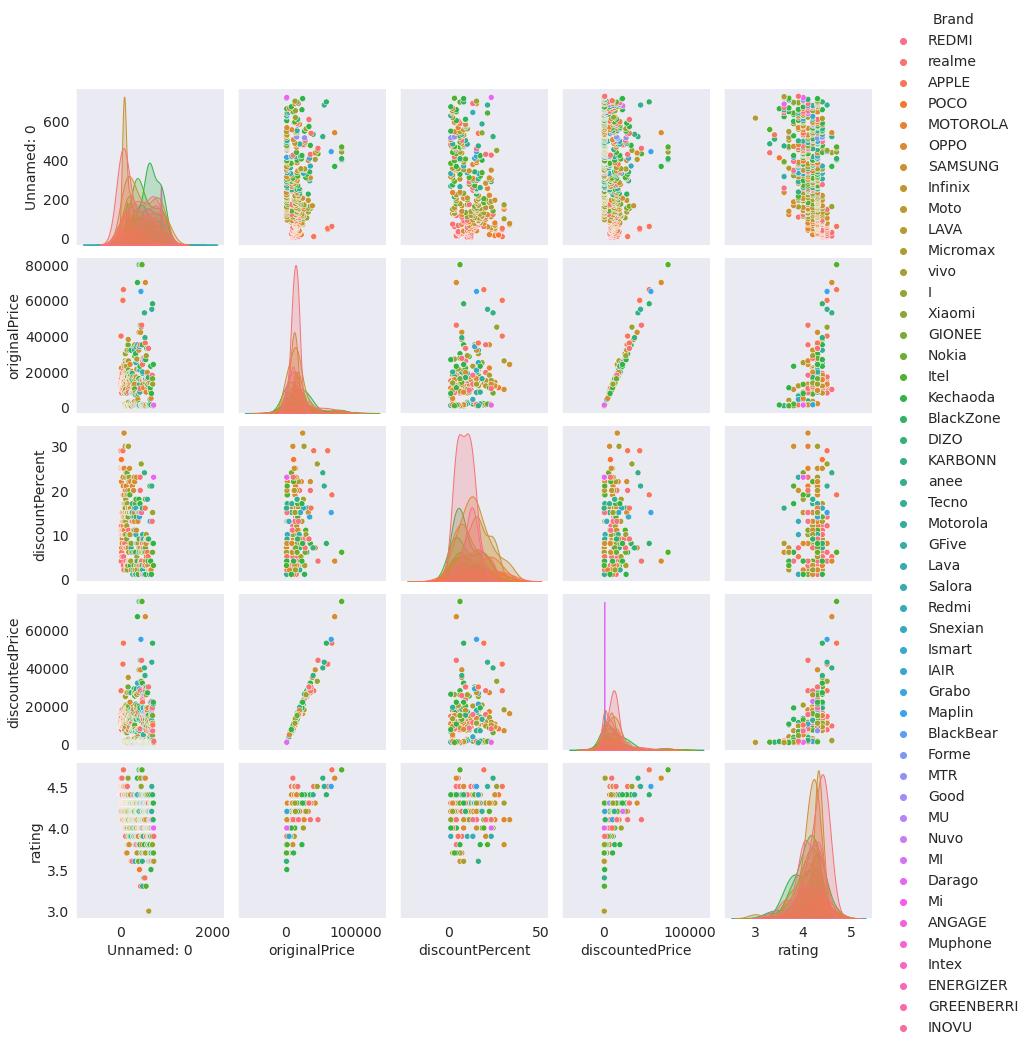

In [ ]:
sns.set_style("dark")
sns.pairplot(mobile_df, hue='Brand');

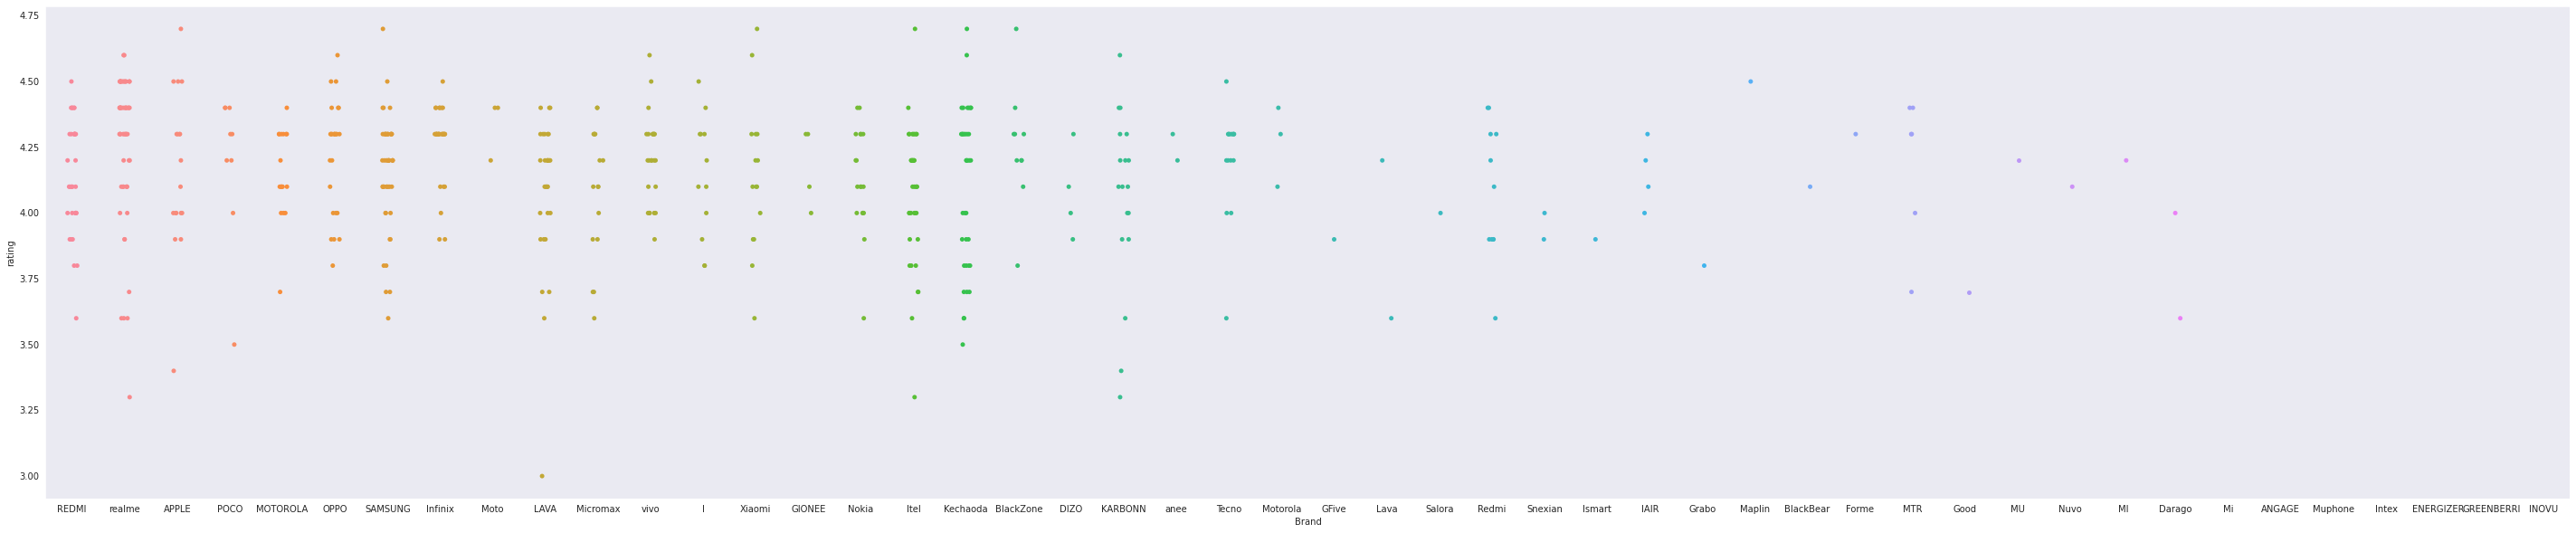

In [ ]:
fig, ax = plt.subplots(figsize=(50,10))
ax = sns.stripplot(y="rating", x="Brand", data=mobile_df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


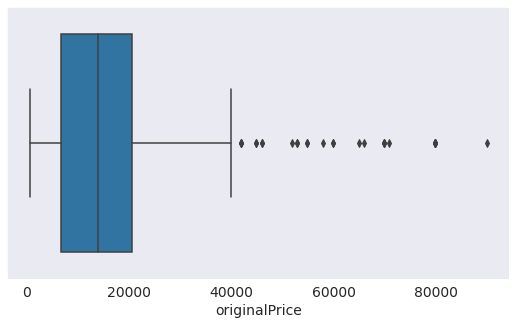

In [ ]:
sns.boxplot(mobile_df["originalPrice"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


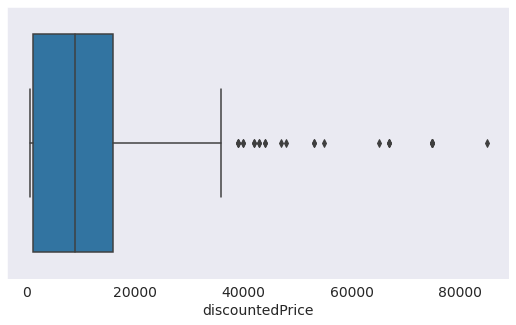

In [ ]:
sns.boxplot(mobile_df["discountedPrice"])

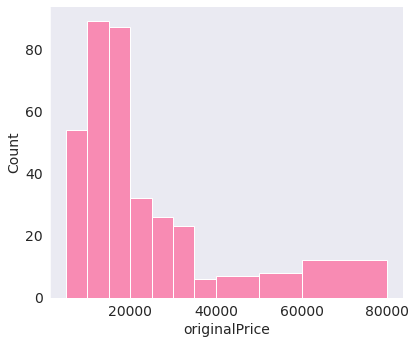

In [ ]:
sns.displot(mobile_df, x='originalPrice',bins=[5000,10000,15000,20000,25000,30000,35000,40000,50000,60000,80000], aspect=1.2,color='#fd6c9e')

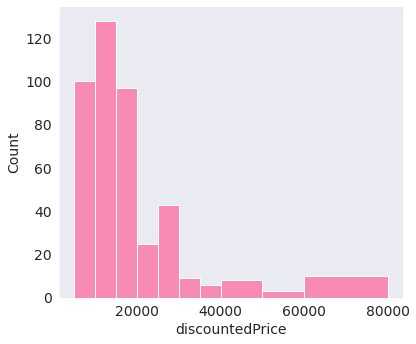

In [ ]:
sns.displot(mobile_df, x='discountedPrice',bins=[5000,10000,15000,20000,25000,30000,35000,40000,50000,60000,80000], aspect=1.2,color='#fd6c9e')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

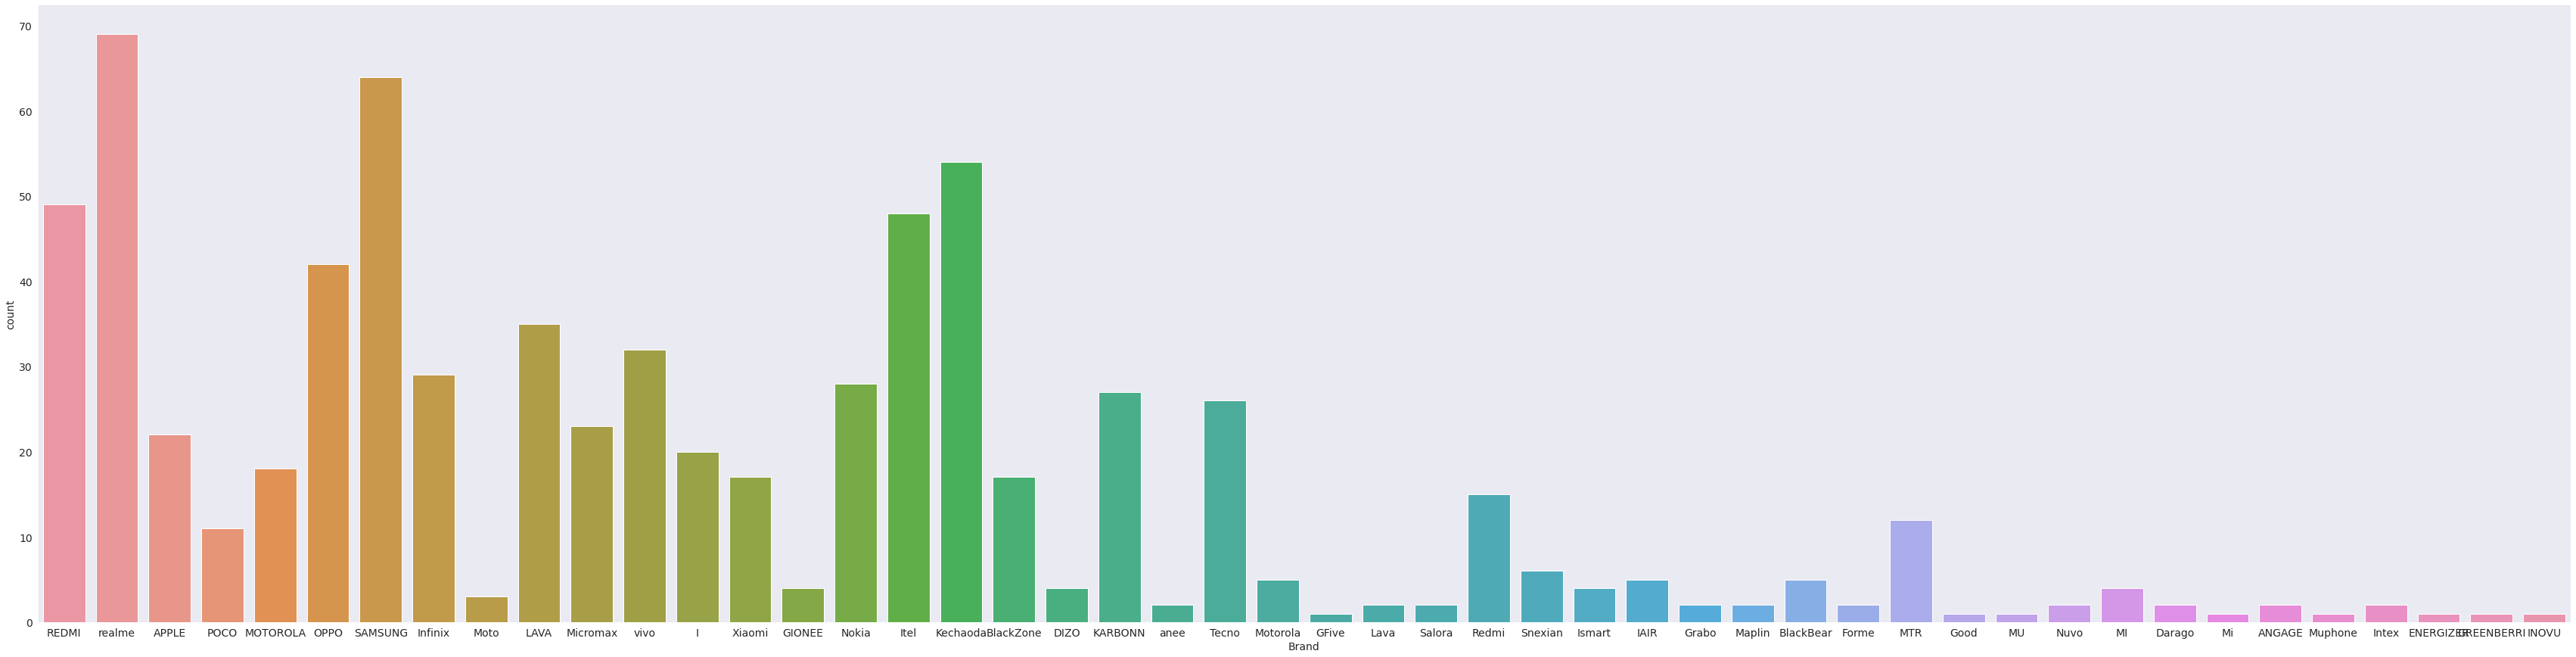

In [ ]:
plt.figure(figsize=(60,15))
sns.countplot(mobile_df.Brand)
plt.show

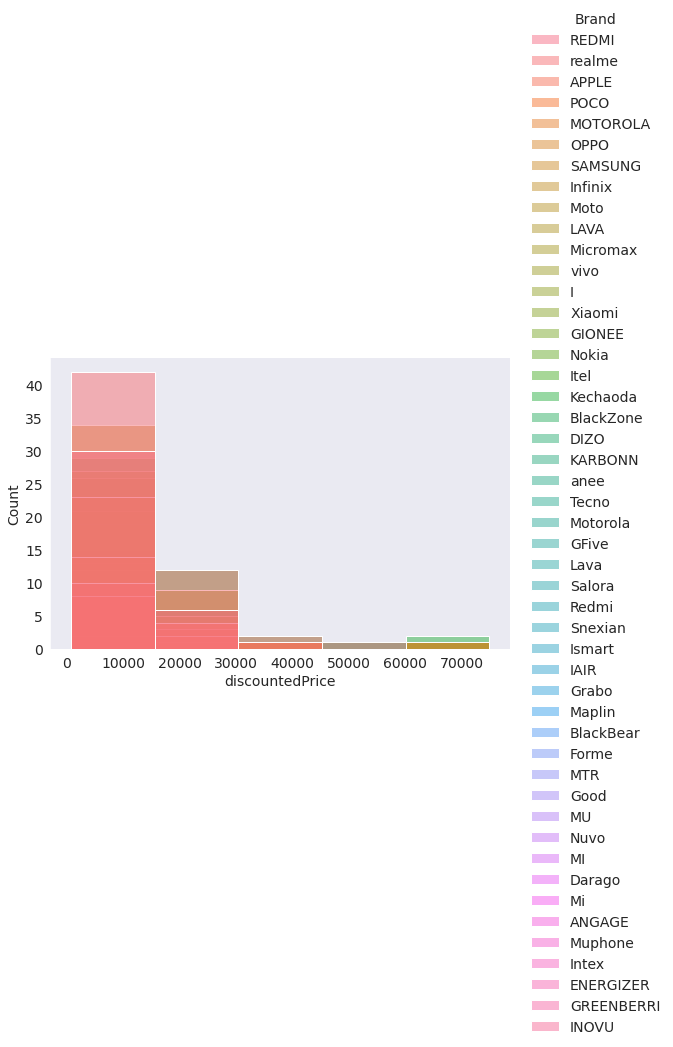

In [ ]:
#brandwise mobile phone price segments
sns.displot(mobile_df, x='discountedPrice',bins=5, hue='Brand',aspect=1.5)

In [ ]:
# Top Rated Mobiles
top_rated_phones = mobile_df.sort_values(by=["rating"], ascending=False)[:50]
top_rated_phones

,Unnamed: 0,Brand,Model,Color,Processor,RAM,Battery,Camera,Display,Warranty,originalPrice,discountPercent,discountedPrice,rating,reviews
294,294,NaN,NaN,Blue,Mediatek Dimensity 1200 Processor,2 GB RAM | 32 GB ROM | Expandable Upto 512 GB,1200 mAh Battery,0.3MP Rear Camera,16.56 cm (6.52 inch) HD+ Display,1 Year Brand Service Center Warranty,70900.0,8% off,64999.0,4.7,"1,56,619 Ratings & 10,717 Reviews"
640,640,NaN,NaN,(PRODUCT,NaN,3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,800 mAh Battery,0.03MP Rear Camera,16.33 cm (6.43 inch) Full HD+ Display,NaN,89900.0,5% off,84900.0,4.7,"1,937 Ratings & 207 Reviews"
399,399,Kechaoda,K115,Midnight,MediaTek Dimensity 700 Processor,8 GB RAM | 128 GB ROM | Expandable Upto 256 GB,1050 mAh Battery,1.3MP Rear Camera,16.56 cm (6.52 inch) Display,1 Year Manufacturer Warranty for Device,79900.0,6% off,74900.0,4.7,"1,937 Ratings & 207 Reviews"
465,465,Itel,"A23 Pro (Sapphire Blue, 8 GB)",Blue,NaN,32 MB RAM | 32 MB ROM,1000 mAh Li-ion Battery,0.3MP Rear Camera,7.11 cm (2.8 inch) Display,NaN,79900.0,6% off,74900.0,4.7,"1,937 Ratings & 207 Reviews"
405,405,BlackZone,PRITHVI,Starlight,Qualcomm Snapdragon 439 Processor,32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,1750 mAh Battery,0.3MP Rear Camera,4.57 cm (1.8 inch) QVGA Display,1 Year Manufacturer Warranty,79900.0,6% off,74900.0,4.7,"1,937 Ratings & 207 Reviews"
406,406,NaN,NaN,Pink,MediaTek Helio G25 Processor,4 MB RAM | 4 MB ROM,3000 mAh Battery,12MP + 12MP | 12MP Front Camera,4.57 cm (1.8 inch) Display,1 Year Warranty,79900.0,6% off,74900.0,4.7,"1,937 Ratings & 207 Reviews"
459,459,SAMSUNG,"Galaxy A22 5G (Violet, 128 GB)",Blue,NaN,32 MB RAM | 24 MB ROM | Expandable Upto 32 GB,1700 mAh Battery,13MP + 2MP | 5MP Front Camera,17.27 cm (6.8 inch) Full HD+ Display,NaN,79900.0,6% off,74900.0,4.7,"1,937 Ratings & 207 Reviews"
439,439,Xiaomi,"11i Hypercharge 5G (Purple Mist, 128 GB)",Blue,NaN,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,Brand Warranty of 1 Year Available for Mobile ...,48MP + 8MP + 2MP + 2MP | 16MP Front Camera,16.48 cm (6.49 inch) Display,NaN,79900.0,6% off,74900.0,4.7,"1,937 Ratings & 207 Reviews"
637,637,NaN,NaN,NaN,NaN,32 MB RAM | 32 MB ROM,1750 mAh Battery,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,120Hz Super AMOLED Display,NaN,NaN,NaN,1025.0,4.7,6 Ratings & 4 Reviews
57,57,APPLE,"iPhone 12 (Black, 64 GB)",Black,A14 Bionic Chip with Next Generation Neural En...,64 GB ROM,5000 mAh Lithium Polymer Battery,48MP + 2MP + AI Lens Camera | 8MP Front Camera,17.32 cm (6.82 inch) HD+ Display,1 Year Warranty Provided by the Manufacturer f...,65900.0,19% off,52999.0,4.7,"1,56,619 Ratings & 10,717 Reviews"


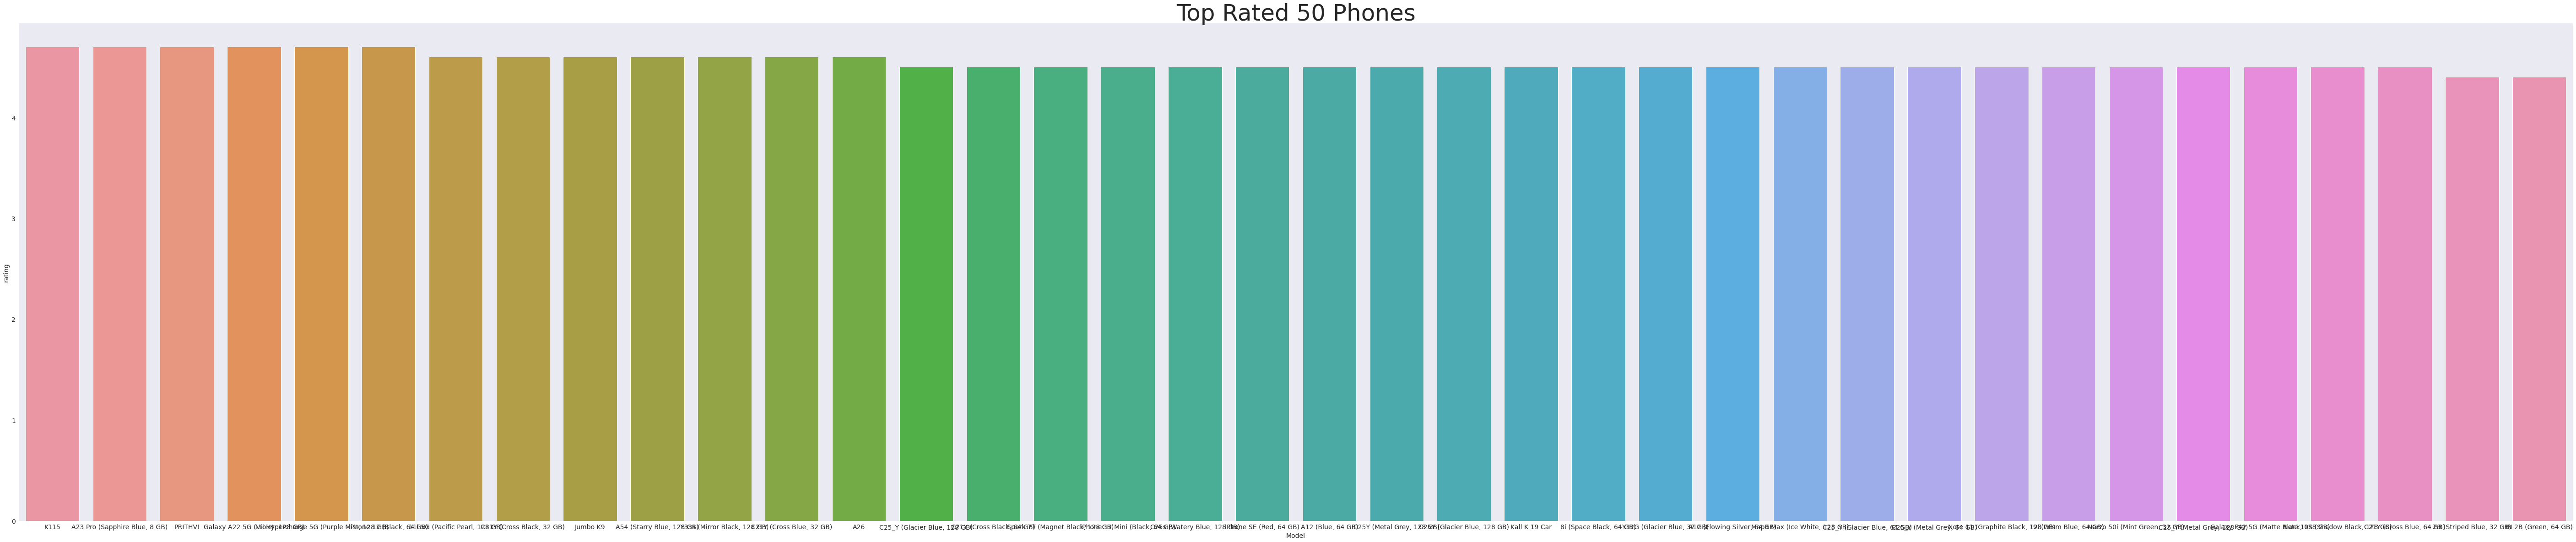

In [ ]:
plt.figure(figsize=(100,20))
sns.barplot(x=top_rated_phones.Model, y=mobile_df.rating)
plt.title("Top Rated 50 Phones", size=50)
plt.show()

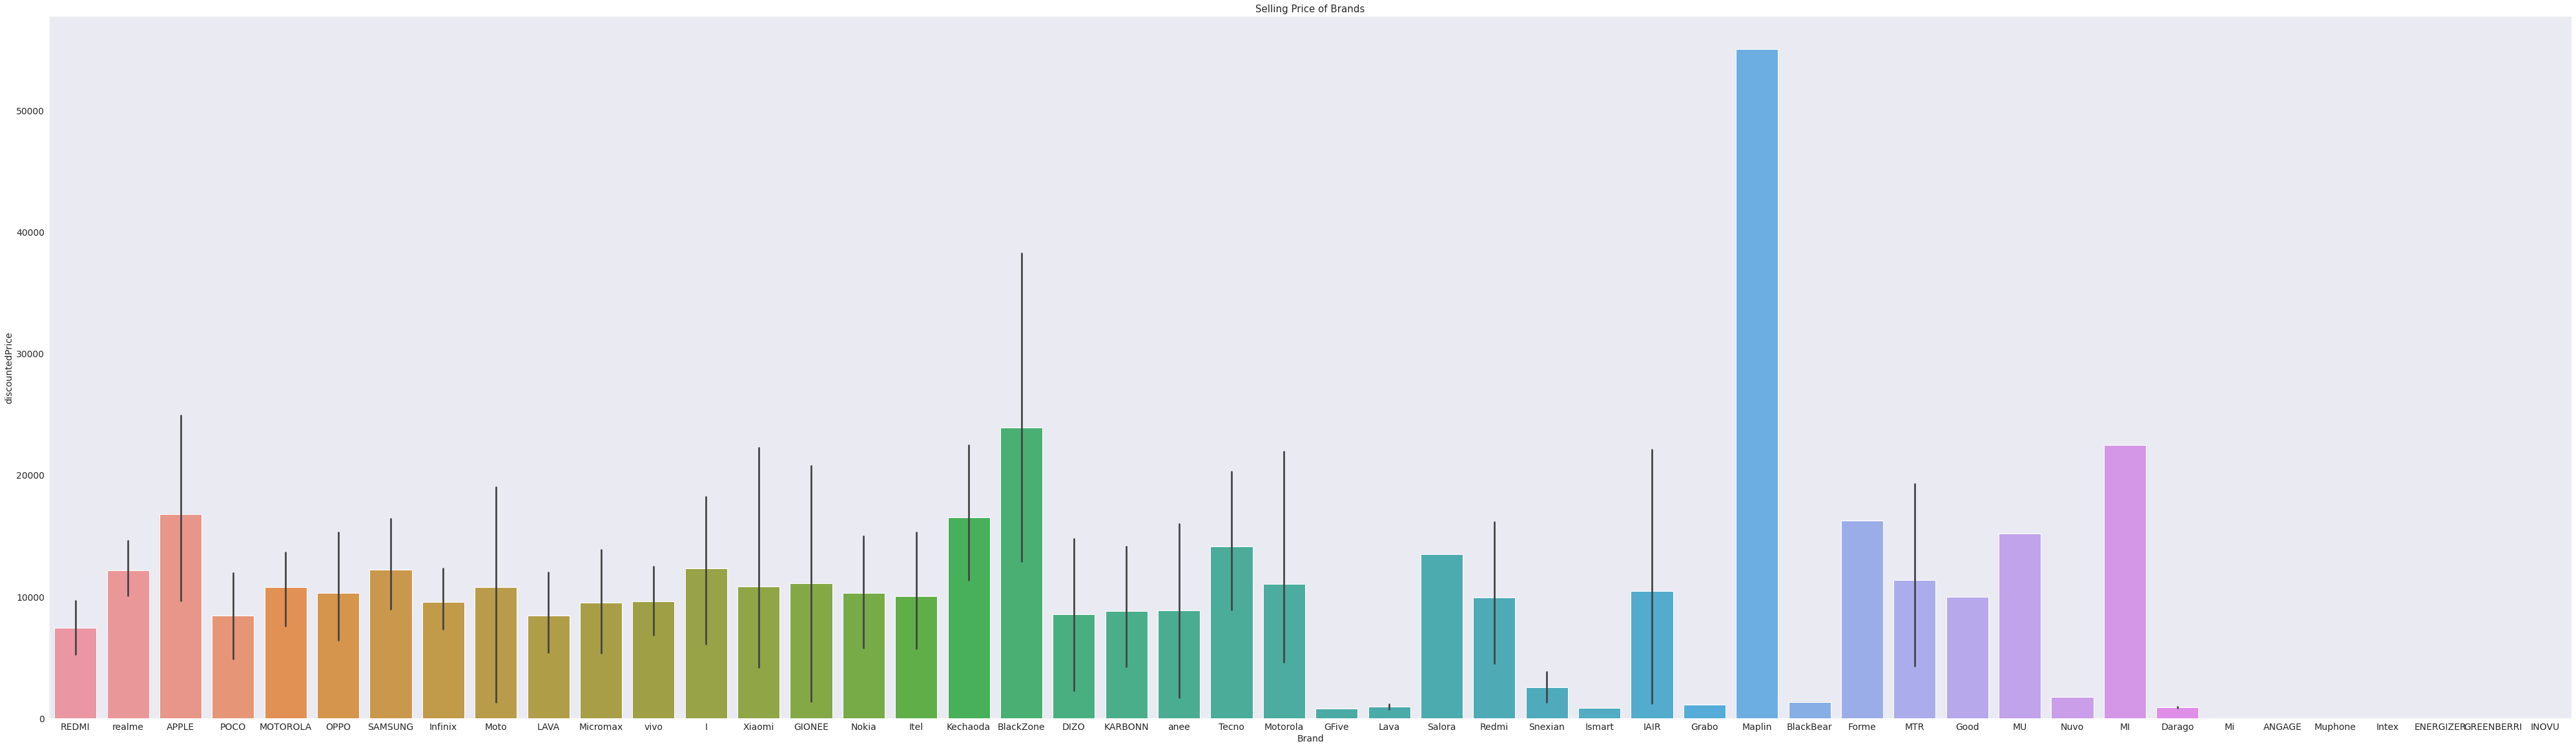

In [ ]:
# Selling Price of Brands
plt.figure(figsize=(70,20))
sns.barplot(x=mobile_df.Brand, y=mobile_df["discountedPrice"])
plt.title("Selling Price of Brands", size=15)
plt.show()

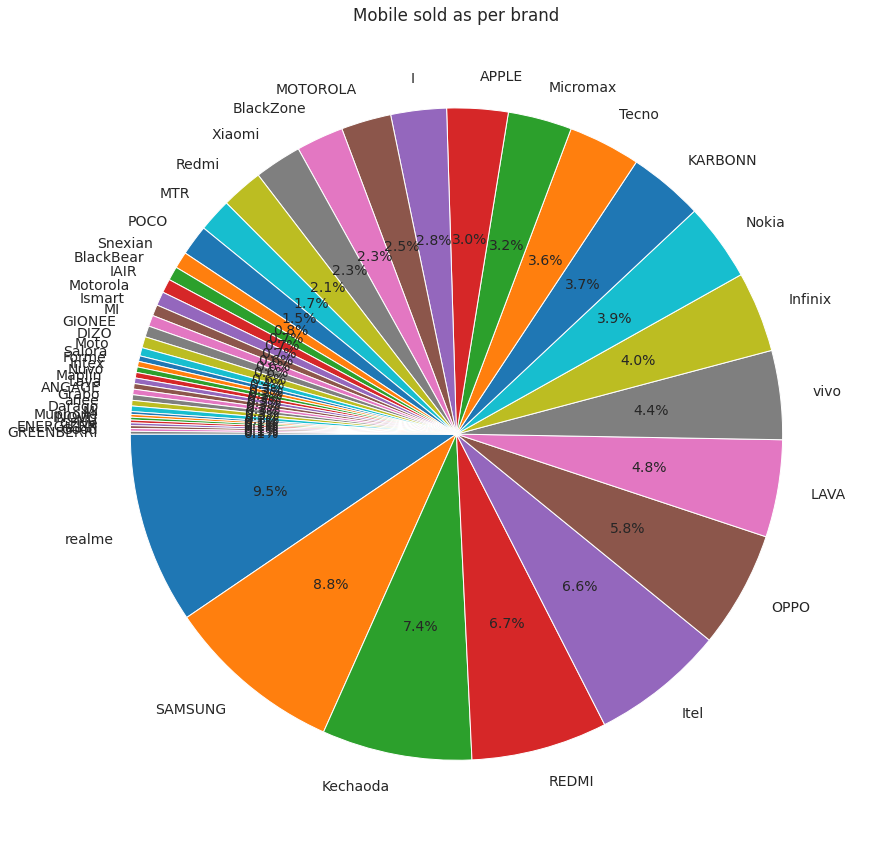

In [ ]:
Brand_counts = mobile_df.Brand.value_counts()
Brand_counts
plt.figure(figsize=(50,15))
plt.title('Mobile sold as per brand')
plt.pie(Brand_counts, labels=Brand_counts.index, autopct='%1.1f%%', startangle=180);

the percentage of mobile phones sold realme have the highest market share followed by samsung

### The average selling price of realme mobile phone

In [ ]:
#Mean of Selling prices
mobile_df.groupby('Brand')['discountedPrice'].mean().sort_values(ascending=False)

Brand
Maplin        54999.000000
BlackZone     23908.181818
MI            22450.000000
APPLE         16753.000000
Kechaoda      16487.411765
Forme         16248.000000
MU            15179.000000
Tecno         14117.937500
Salora        13499.000000
I             12330.666667
SAMSUNG       12218.422222
realme        12151.072727
MTR           11343.000000
GIONEE        11068.250000
Motorola      11049.000000
Xiaomi        10843.333333
MOTOROLA      10779.111111
Moto          10765.666667
IAIR          10471.500000
Nokia         10319.111111
OPPO          10273.370370
Itel          10047.485714
Good           9999.000000
Redmi          9918.272727
vivo           9621.000000
Infinix        9524.310345
Micromax       9507.882353
anee           8848.000000
KARBONN        8817.277778
DIZO           8525.000000
LAVA           8447.580645
POCO           8421.200000
REDMI          7407.500000
Snexian        2549.000000
Nuvo           1750.000000
BlackBear      1310.000000
Grabo          1105.00

### Total models of realme Brand

In [ ]:
top_realme_model = mobile_df.Model.value_counts().head(25)
top_realme_model

K115                                         8
S600                                         6
K33                                          6
Galaxy A12 (Black, 128 GB)                   5
K9                                           5
B5 Bucket                                    5
IS-101 Ferrari                               4
KX3                                          4
KX 10i                                       4
A1 2021                                      4
A1                                           4
Hero 600+                                    4
IT2163                                       4
ECO X                                        4
A26                                          4
Power 410                                    4
K10                                          4
Muzik 400 Core                               3
3310 DS 2020                                 3
GT Master Edition (Daybreak Blue, 128 GB)    3
Kall K88                                     3
Galaxy A12 (B

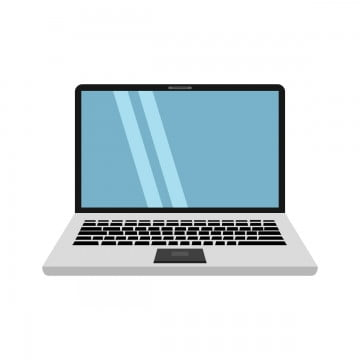
# ***Laptop***

In [ ]:
Laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        669 non-null    int64  
 1   Brand             660 non-null    object 
 2   Model             660 non-null    object 
 3   Processor         649 non-null    object 
 4   RAM               661 non-null    object 
 5   Operating System  669 non-null    object 
 6   Storage           654 non-null    object 
 7   Display           668 non-null    object 
 8   Warranty          609 non-null    object 
 9   originalPrice     599 non-null    object 
 10  discountPercent   593 non-null    object 
 11  discountedPrice   658 non-null    object 
 12  rating            461 non-null    float64
 13  reviews           461 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 73.3+ KB


## Data Cleaning

In [ ]:
#Removing ₹ from originalPrice, discountedPrice
Laptop_df['originalPrice'] = pd.to_numeric(Laptop_df['originalPrice'].replace('[^0-9\.-]', "", regex=True))
Laptop_df['discountedPrice'] = pd.to_numeric(Laptop_df['discountedPrice'].replace('[^0-9\.-]', "", regex=True))
Laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        669 non-null    int64  
 1   Brand             660 non-null    object 
 2   Model             660 non-null    object 
 3   Processor         649 non-null    object 
 4   RAM               661 non-null    object 
 5   Operating System  669 non-null    object 
 6   Storage           654 non-null    object 
 7   Display           668 non-null    object 
 8   Warranty          609 non-null    object 
 9   originalPrice     599 non-null    float64
 10  discountPercent   593 non-null    object 
 11  discountedPrice   658 non-null    float64
 12  rating            461 non-null    float64
 13  reviews           461 non-null    object 
dtypes: float64(3), int64(1), object(10)
memory usage: 73.3+ KB


In [ ]:
Laptop_df['discountPercent'] = pd.to_numeric(Laptop_df['discountPercent'].replace("[^0-9]", "", regex=True))
Laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        669 non-null    int64  
 1   Brand             660 non-null    object 
 2   Model             660 non-null    object 
 3   Processor         649 non-null    object 
 4   RAM               661 non-null    object 
 5   Operating System  669 non-null    object 
 6   Storage           654 non-null    object 
 7   Display           668 non-null    object 
 8   Warranty          609 non-null    object 
 9   originalPrice     599 non-null    float64
 10  discountPercent   593 non-null    float64
 11  discountedPrice   658 non-null    float64
 12  rating            461 non-null    float64
 13  reviews           461 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 73.3+ KB


In [ ]:
Laptop_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,669.0,334.000000,193.267949,0.0,167.00,334.0,501.0,668.0
originalPrice,599.0,92248.417362,49142.849625,21990.0,57047.00,81990.0,111259.5,377798.0
discountPercent,593.0,18.848229,9.017095,1.0,14.00,19.0,25.0,53.0
discountedPrice,658.0,76792.235562,44222.666989,16990.0,46921.75,64990.0,89990.0,441990.0
rating,461.0,4.291540,0.371826,1.6,4.10,4.3,4.5,5.0


In [ ]:
Laptop_df.head()

,Unnamed: 0,Brand,Model,Processor,RAM,Operating System,Storage,Display,Warranty,originalPrice,discountPercent,discountedPrice,rating,reviews
0,0,HP,Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11...,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,49590.0,15.0,41990.0,4.3,511 Ratings & 39 Reviews
1,1,ASUS,Vivobook Gaming Core i5 9th Gen - (8 GB/1 TB H...,Intel Core i5 Processor (9th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,77990.0,33.0,51490.0,4.5,33 Ratings & 5 Reviews
2,2,Lenovo,IdeaPad 3 Celeron Dual Core 4th Gen - (4 GB/25...,Intel Celeron Dual Core Processor (4th Gen),4 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Display,1 Years Carry in Warranty,40490.0,27.0,29490.0,4.1,129 Ratings & 9 Reviews
3,3,Lenovo,APU Dual Core A9 A99425 - (4 GB/1 TB HDD/DOS) ...,AMD APU Dual Core A9 Processor,4 GB DDR4 RAM,64 bit DOS Operating System,1 TB HDD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,NaN,NaN,21896.0,3.9,197 Ratings & 13 Reviews
4,4,acer,Aspire 7 Core i5 10th Gen - (8 GB/512 GB SSD/W...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year International Travelers Warranty,89999.0,36.0,56990.0,4.4,"9,117 Ratings & 981 Reviews"


In [ ]:
Laptop_df.sample(15)

,Unnamed: 0,Brand,Model,Processor,RAM,Operating System,Storage,Display,Warranty,originalPrice,discountPercent,discountedPrice,rating,reviews
537,537,Lenovo,Core i7 10th Gen - (16 GB/512 GB SSD/Windows 1...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD,35.56 cm (14 inch) Display,1 Year Domestic Brand Warranty on Device,206997.0,NaN,172999.0,NaN,NaN
287,287,ASUS,ASUS TUF Gaming Core i7 11th Gen - (16 GB/1 TB...,Intel Celeron Dual Core Processor,16 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Touchscreen Display,1 Year International Travelers Warranty (ITW),136990.0,NaN,105990.0,4.6,380 Ratings & 49 Reviews
543,543,DELL,Inspiron Core i3 11th Gen - (8 GB/1 TB HDD/256...,Intel Core i3 Processor (11th Gen),32 GB DDR4 RAM,Windows 10 Operating System,1 TB HDD|256 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,58490.0,NaN,49999.0,4.2,28 Ratings & 1 Reviews
663,663,NaN,NaN,NaN,NaN,64 bit Windows 10 Operating System,NaN,29.46 cm (11.6 inch) Touchscreen Display,NaN,NaN,NaN,NaN,NaN,NaN
15,15,APPLE,2020 Macbook Air M1 - (8 GB/256 GB SSD/Mac OS ...,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Mac OS Operating System,256 GB SSD,33.78 cm (13.3 inch) Display,1 Year Onsite Warranty,92900.0,NaN,87490.0,4.7,"6,109 Ratings & 586 Reviews"
302,302,acer,Predator Triton 300 Core i7 10th Gen - (16 GB/...,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,PCI-e Gen4 SSD?SHIFT?Matrix Display (Extend)?C...,29.46 cm (11.6 inch) Touchscreen Display,1 Year Onsite Warranty,160190.0,NaN,159990.0,3.8,4 Ratings & 0 Reviews
138,138,ASUS,ROG Strix G15 (2021) Ryzen 7 Octa Core 4800H -...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,35.56 cm (14 inch) Display,1 Year Onsite Warranty,90990.0,NaN,76990.0,4.4,115 Ratings & 16 Reviews
284,284,ASUS,Vivobook 15 Core i5 11th Gen - (8 GB + 32 GB O...,Intel Celeron Dual Core Processor (4th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,1 Year Onsite Warranty,70990.0,NaN,55490.0,4.6,9 Ratings & 0 Reviews
274,274,acer,Predator Helios 300 Core i7 11th Gen - (16 GB/...,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB SSD,33.78 cm (13.3 inch) Touchscreen Display,1 Year Onsite Warranty,149990.0,NaN,129990.0,4.5,45 Ratings & 6 Reviews
497,497,Lenovo,IdeaPad Gaming 3 Core i5 10th Gen - (8 GB/512 ...,Intel Core i5 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,256 GB SSD,35.56 cm (14 inch) Touchscreen Display,1 Year Onsite Warranty,68434.0,NaN,64988.0,4.3,407 Ratings & 33 Reviews


In [ ]:
Laptop_df['Brand'].groupby(Laptop_df['Brand']).count().sort_values(ascending=False)

Brand
ASUS         202
HP           132
DELL         106
Lenovo       104
MSI           34
acer          33
APPLE         17
Infinix        5
Avita          5
realme         3
lenovo         3
MICROSOFT      3
Nokia          3
Vaio           3
ALIENWARE      3
Mi             2
LG             1
RedmiBook      1
Name: Brand, dtype: int64

In [ ]:
Laptop_df['Brand'].groupby(Laptop_df['RAM']).count().sort_values(ascending=False)

RAM
8 GB DDR4 RAM                                    354
16 GB DDR4 RAM                                   150
4 GB DDR4 RAM                                     60
8 GB LPDDR4X RAM                                  27
16 GB LPDDR4X RAM                                 24
8 GB LPDDR3 RAM                                    7
4 GB LPDDR4 RAM                                    7
8 GB DDR3 RAM                                      6
32 GB DDR4 RAM                                     5
16 GB Unified Memory RAM                           5
32 GB LPDDR4X RAM                                  4
16 GB LPDDR3 RAM                                   4
4 GB LPDDR4X RAM                                   3
16 GB DDR3 RAM                                     2
Upgradable SSD Upto 512 GB and RAM Upto 32 GB      1
8 GB LPDDR4 RAM                                    1
Name: Brand, dtype: int64

In [ ]:
total_sales = Laptop_df.discountedPrice.sum()
total_sales

50529291.0

## Exploratory Analysis and Visualization

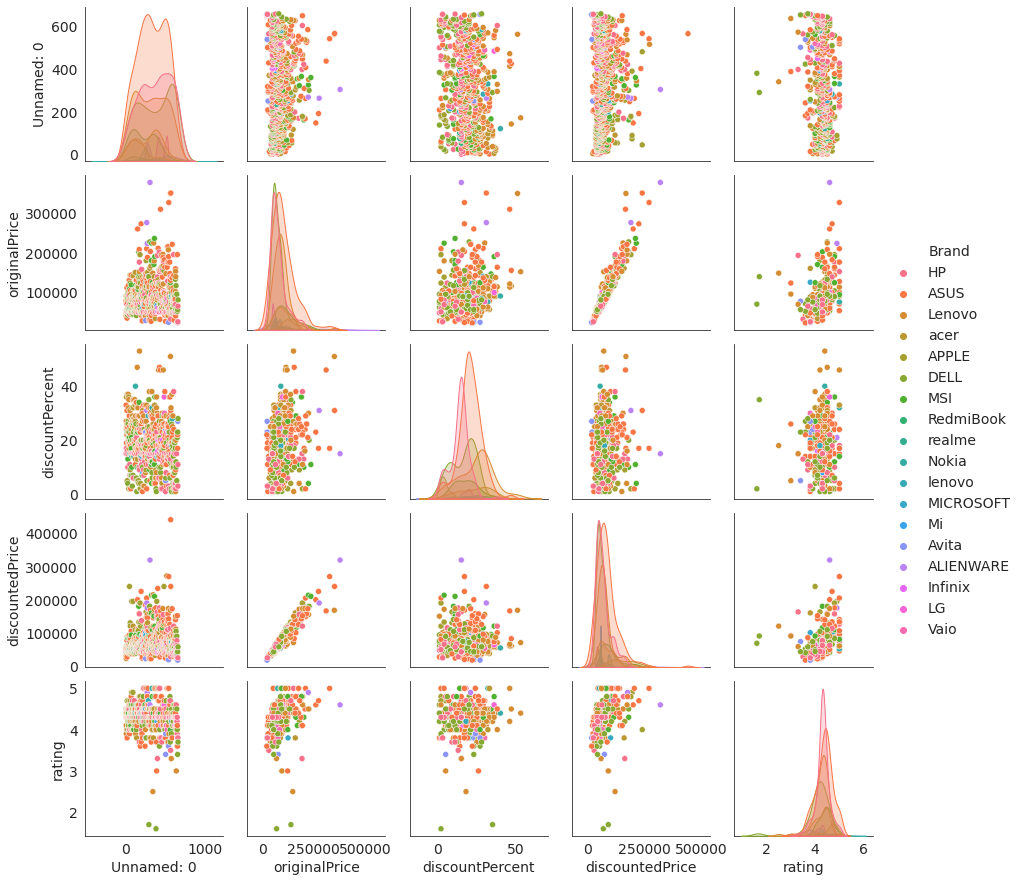

In [ ]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
sns.set_style("white")
sns.pairplot(Laptop_df, hue='Brand');

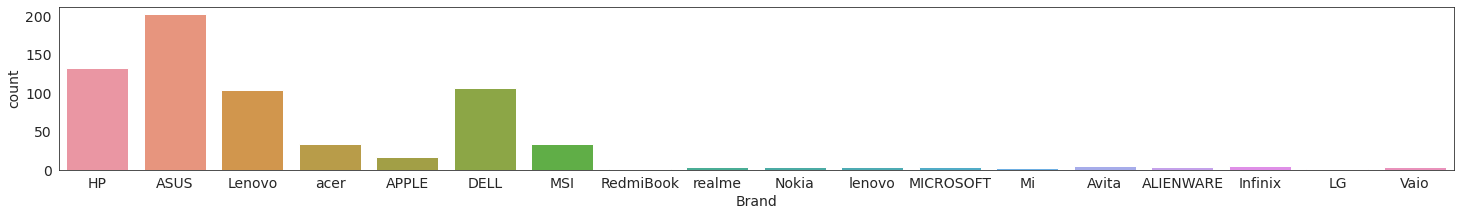

In [ ]:
#Showing the counts of Laptops per brand
fig, ax = plt.subplots(figsize=(25,3))
ax=sns.countplot(x="Brand", data=Laptop_df)

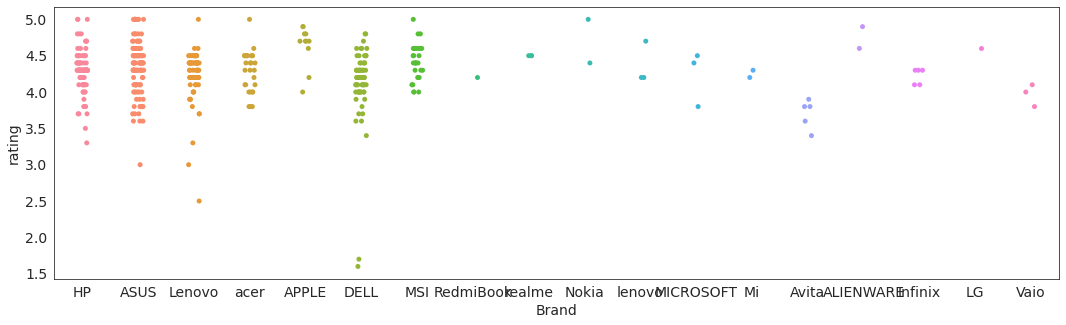

In [ ]:
fig, ax = plt.subplots(figsize=(18,5))
ax = sns.stripplot(y="rating", x="Brand", data=Laptop_df)

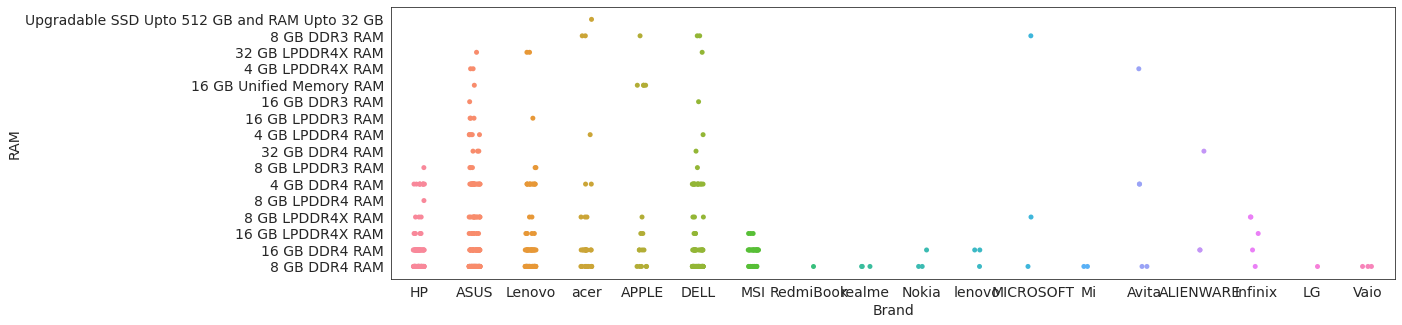

In [ ]:
fig, ax = plt.subplots(figsize=(18,5))
ax = sns.stripplot(y="RAM", x="Brand", data=Laptop_df)

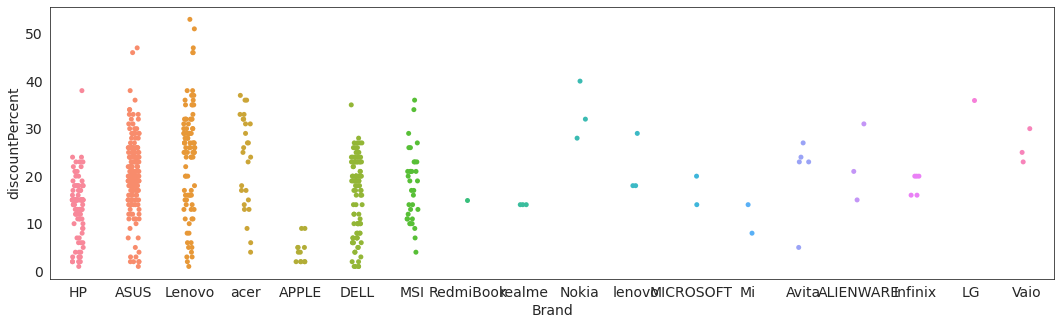

In [ ]:
fig, ax = plt.subplots(figsize=(18,5))
ax = sns.stripplot(y="discountPercent", x="Brand", data=Laptop_df)

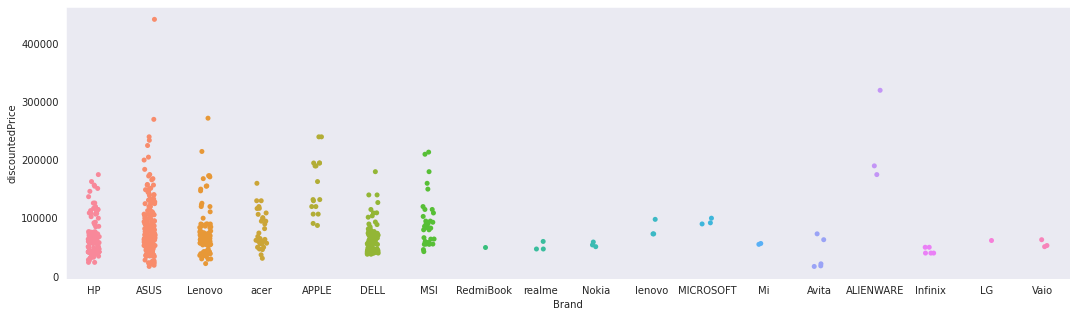

In [ ]:
fig, ax = plt.subplots(figsize=(18,5))
ax = sns.stripplot(y="discountedPrice", x="Brand", data=Laptop_df)

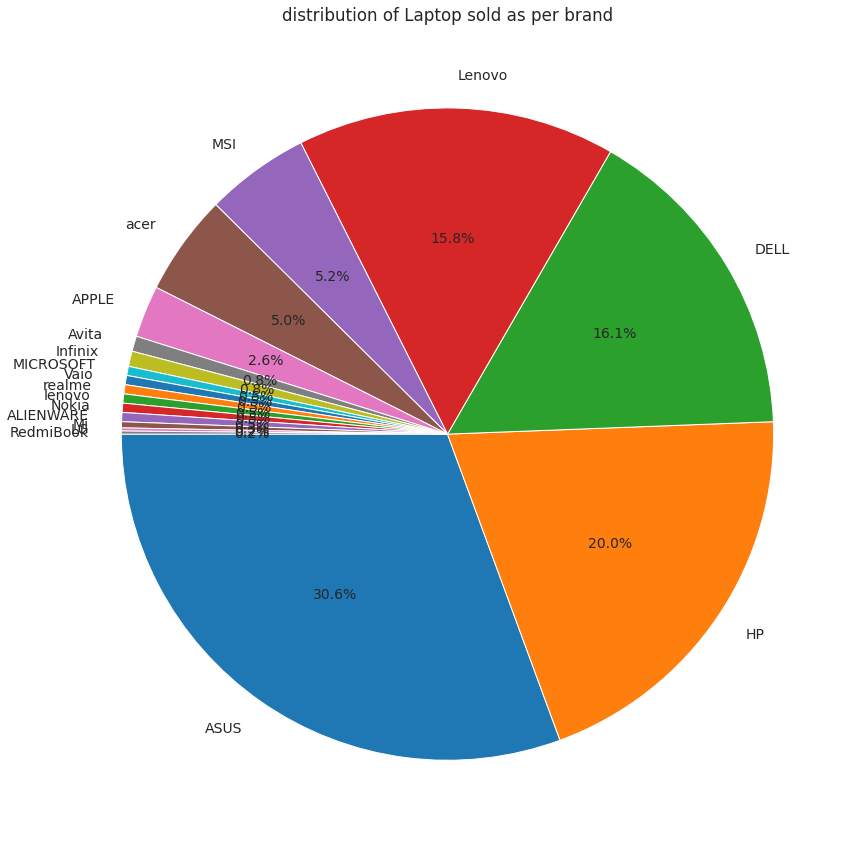

In [ ]:
Brand_counts = Laptop_df.Brand.value_counts()
Brand_counts
plt.figure(figsize=(50,15))
plt.title('distribution of Laptop sold as per brand')
plt.pie(Brand_counts, labels=Brand_counts.index, autopct='%1.1f%%', startangle=180);

### The average selling price of ASUS Laptops


In [ ]:
Laptop_df.groupby('Brand')['discountedPrice'].mean().sort_values(ascending=False)

Brand
ALIENWARE    228323.333333
APPLE        154922.352941
MICROSOFT     94026.333333
MSI           93602.852941
ASUS          83225.425743
lenovo        81323.333333
acer          79837.375000
Lenovo        75149.298077
HP            65514.712121
LG            62990.000000
DELL          62380.057143
Mi            55744.500000
Vaio          55656.666667
Nokia         54656.666667
realme        51332.333333
RedmiBook     50490.000000
Infinix       43991.800000
Avita         38504.600000
Name: discountedPrice, dtype: float64

In [ ]:
top_Laptop_model = Laptop_df.Model.value_counts().head(15)
top_Laptop_model

Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-du3563TU Thin and Light Laptop                 30
TUF Gaming F15 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeForce G...     4
IdeaPad Gaming 3 Core i5 11th Gen - (8 GB/512 GB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeFor...       4
ROG Flow X13 Ryzen 9 Octa Core 5900HS - (32 GB/1 TB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeFo...     3
Inspiron Core i5 11th Gen - (8 GB/512 GB SSD/Windows 10) Inspiron 5410 2 in 1 Laptop                     3
INBook X1 Core i3 10th Gen - (8 GB/256 GB SSD/Windows 11 Home) XL11 Thin and Light Laptop                3
ROG Flow X13 Ryzen 9 Octa Core 5900HS - (16 GB/1 TB SSD/Windows 10 Home/4 GB Graphics/NVIDIA GeFo...     3
Vostro Core i3 11th Gen - (4 GB/1 TB HDD/256 GB SSD/Windows 11 Home) Vostro 3400 Thin and Light L...     2
MacBook Pro with Touch Bar Core i5 10th Gen - (16 GB/1 TB SSD/Mac OS Catalina) MWP52HN/A                 2
Vostro Core i3 11th Gen - (4 GB/1 TB 

In [ ]:
top_DiscountLaptop_model = Laptop_df.discountPercent.value_counts().head(15)
top_DiscountLaptop_model

15.0    47
20.0    35
18.0    32
19.0    30
23.0    28
24.0    25
14.0    24
17.0    22
26.0    22
21.0    22
25.0    20
29.0    20
16.0    18
27.0    17
13.0    17
Name: discountPercent, dtype: int64

# ***Both Mobile and Laptop***

In [ ]:
x=['Mobiles','Laptops']
y=[mobile_df['discountPercent'].mean(),Laptop_df['discountPercent'].mean()]

In [ ]:
fig = go.Figure(data=[go.Bar(x=x, y=y)])

fig.update_traces(marker_color='rgb(255,160,122)', marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5, opacity=0.6)
fig.update_layout(title_text='Discounts')
fig.show()

In [ ]:
mobile_df['discountedPrice']=mobile_df['discountedPrice'].astype(str).astype(int)
mobile_df['originalPrice']=mobile_df['originalPrice'].astype(str).astype(int)

Laptop_df['discountedPrice']=Laptop_df['discountedPrice'].astype(str).astype(int)
Laptop_df['originalPrice']=Laptop_df['originalPrice'].astype(str).astype(int)

In [ ]:
features=['discountedPrice','originalPrice','discountPercent']
fig = go.Figure(data=[
    go.Bar(name='Mobile', x=features, y=[mobile_df['discountedPrice'].mean()
                                                  ,mobile_df['originalPrice'].mean()
                                                 ,mobile_df['discountPercent'].mean()]),
    go.Bar(name='Laptop', x=features, y=[Laptop_df['discountedPrice'].mean()
                                                  ,Laptop_df['originalPrice'].mean()
                                                 ,Laptop_df['discountPercent'].mean()])
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.show()